<a href="https://colab.research.google.com/github/ABHISHEK2334/ABHISHEK-/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
x=data.data
y=data.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)
print(l.coef_)
print(l.intercept_)


[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [ ]:
y_pred=l.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score=",r2_score(y_test,y_pred))
print("mean_square_error=",mean_squared_error(y_test,y_pred))

r2_score= 0.5188113124539249
mean_square_error= 2374.333939618319


In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [ ]:
R.fit(x_train,y_train)

Ridge(alpha=100000)

In [ ]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [ ]:
y_pred1=R.predict(x_test)
print("r2score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))


r2score -0.00042490200441935855
RMSE 70.25956272917782


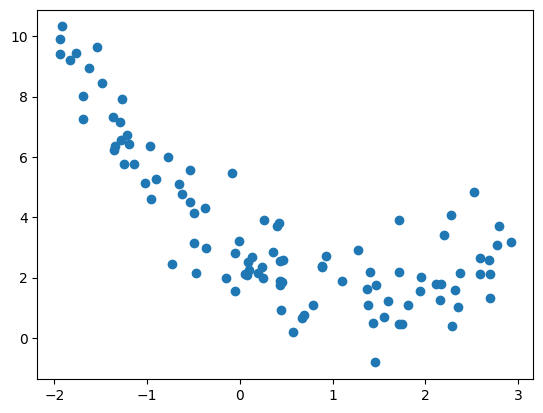

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

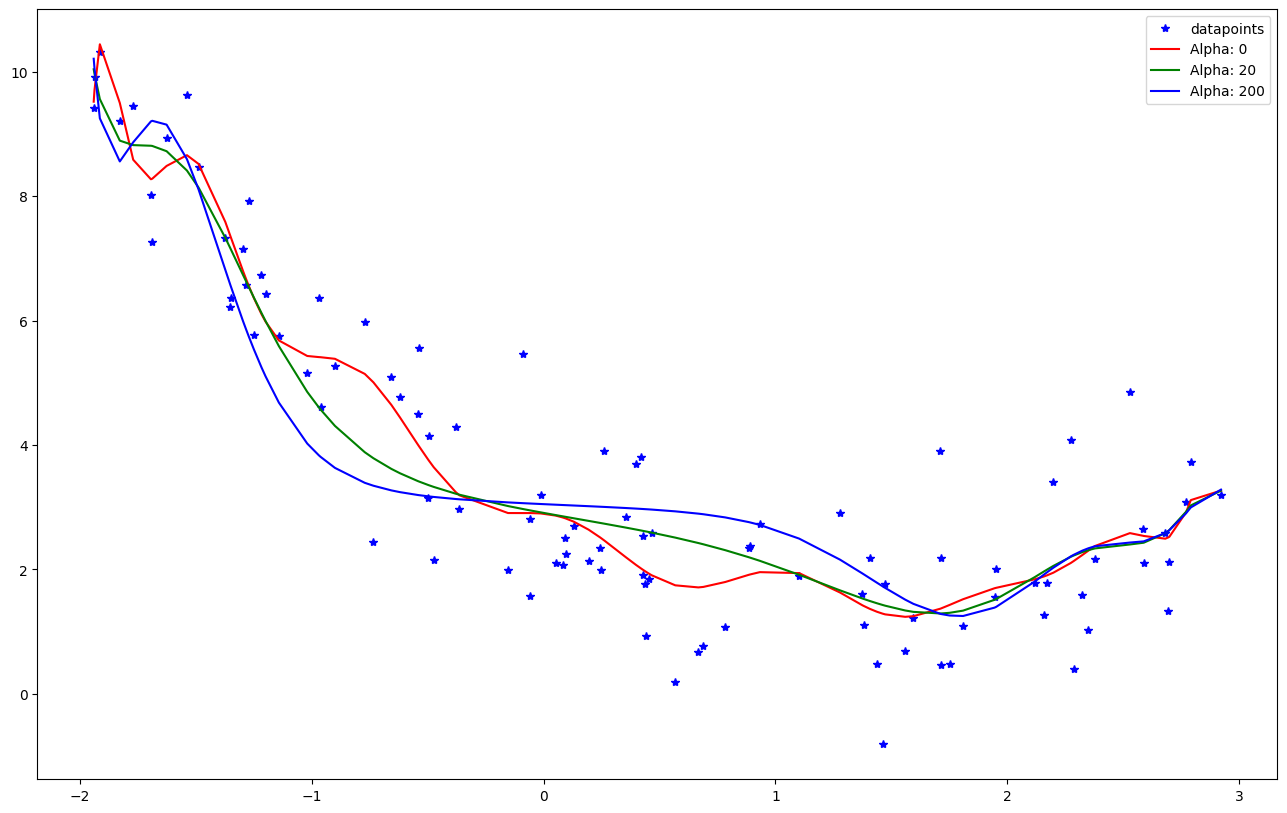

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def pred_ridge(x1,x2,alpha):
  X=Pipeline([
      ("poly_features",PolynomialFeatures(degree=16)),
      ("ridge",Ridge(alpha=alpha))
  ])
  X.fit(x1,x2)
  return X.predict(x1)
alphas=[0,20,200]
cs=['r','g','b']
plt.figure(figsize=(16,10))
plt.plot(x1,x2,'b*',label='datapoints')
for alpha,c in zip(alphas,cs):
  pred=pred_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:, 0]), pred[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate some example data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
